In [1]:
import numpy as np
import netCDF4 as nc
import os
import matplotlib.pyplot as plt
from pyproj import Proj
import datetime

In [26]:
input_source = '/localdata/Stats_Project/20180501_South/Flash_Energy/'
output_source = '/localdata/Stats_Project/20180501_South/'

In [19]:
#Function that assigns the window to pull the data from as a function of time
def frames(dtime):
    if dtime < datetime.datetime(2019, 5, 1, 21, 26, 10):
        nw_lat = 37.38
        nw_lon = -100.31
        se_lat = 36.5
        se_lon = -98.46
    elif dtime > datetime.datetime(2018, 5, 1, 21, 26, 10) and dtime < datetime.datetime(2018, 5, 1, 22, 3, 10):
        print ('Yeet')
        nw_lat = 40.58
        nw_lon = -98.85
        se_lat = 40.27
        se_lon = -97.82
    elif dtime > datetime.datetime(2018, 5, 1, 22, 3, 10):
        nw_lat = 40.77
        nw_lon = -98.16
        se_lat = 40.44
        se_lon = -97.56
    else:
        print ('FAIL!')
        
    return nw_lat,nw_lon,se_lat,se_lon

In [27]:
var_output = np.empty([0])
times = np.empty([0])

for GLM_file in os.listdir(input_source):
    #Loading in the data
    nc_file = nc.Dataset(input_source+GLM_file, 'r')
    var = nc_file.variables['total_energy'][:,:]
    var = np.squeeze(var)
    
    time = nc.num2date(nc_file.variables['time'][:] , nc_file.variables['time'].units)
    times = np.append(times, time)
    print(time)
    
    sat_h = nc_file.variables['goes_imager_projection'].perspective_point_height
    sat_lon = nc_file.variables['goes_imager_projection'].longitude_of_projection_origin
    sat_sweep = nc_file.variables['goes_imager_projection'].sweep_angle_axis
    p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)
    X = nc_file.variables['x'][:] * sat_h
    Y = nc_file.variables['y'][:] * sat_h
    XX, YY = np.meshgrid(X, Y)
    lons, lats = p(XX, YY, inverse=True)
    lons = lons.T
    lats = lats.T
    
    nw_lat,nw_lon,se_lat,se_lon = frames(time)
    locations = (lons<se_lon) &  (lons>nw_lon) & (lats<nw_lat) & (lats>se_lat)
    cut_var = var[locations]
    var_output = np.append(var_output,np.max(cut_var))

[datetime.datetime(2018, 5, 1, 22, 0)]
[datetime.datetime(2018, 5, 1, 22, 1)]
[datetime.datetime(2018, 5, 1, 22, 2)]
[datetime.datetime(2018, 5, 1, 22, 3)]
[datetime.datetime(2018, 5, 1, 22, 4)]
[datetime.datetime(2018, 5, 1, 22, 5)]
[datetime.datetime(2018, 5, 1, 22, 6)]
[datetime.datetime(2018, 5, 1, 22, 7)]
[datetime.datetime(2018, 5, 1, 22, 8)]
[datetime.datetime(2018, 5, 1, 22, 9)]
[datetime.datetime(2018, 5, 1, 22, 10)]
[datetime.datetime(2018, 5, 1, 22, 11)]
[datetime.datetime(2018, 5, 1, 22, 12)]
[datetime.datetime(2018, 5, 1, 22, 13)]
[datetime.datetime(2018, 5, 1, 22, 14)]
[datetime.datetime(2018, 5, 1, 22, 15)]
[datetime.datetime(2018, 5, 1, 22, 16)]
[datetime.datetime(2018, 5, 1, 22, 17)]
[datetime.datetime(2018, 5, 1, 22, 18)]
[datetime.datetime(2018, 5, 1, 22, 19)]
[datetime.datetime(2018, 5, 1, 22, 20)]
[datetime.datetime(2018, 5, 1, 22, 21)]
[datetime.datetime(2018, 5, 1, 22, 22)]
[datetime.datetime(2018, 5, 1, 22, 23)]
[datetime.datetime(2018, 5, 1, 22, 24)]
[datetime.

[datetime.datetime(2018, 5, 2, 1, 29)]
[datetime.datetime(2018, 5, 2, 1, 30)]


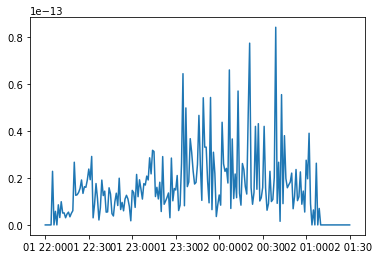

In [30]:
plt.plot(times,var_output)
plt.show()

In [29]:
var_output.shape

(211,)

In [31]:
np.savetxt(output_source+'Flash_Energy_MAX.txt',var_output)

[datetime.datetime(2018, 5, 1, 20, 0) datetime.datetime(2018, 5, 1, 20, 1)
 datetime.datetime(2018, 5, 1, 20, 2) datetime.datetime(2018, 5, 1, 20, 3)
 datetime.datetime(2018, 5, 1, 20, 4) datetime.datetime(2018, 5, 1, 20, 5)
 datetime.datetime(2018, 5, 1, 20, 6) datetime.datetime(2018, 5, 1, 20, 7)
 datetime.datetime(2018, 5, 1, 20, 8) datetime.datetime(2018, 5, 1, 20, 9)
 datetime.datetime(2018, 5, 1, 20, 10)
 datetime.datetime(2018, 5, 1, 20, 11)
 datetime.datetime(2018, 5, 1, 20, 12)
 datetime.datetime(2018, 5, 1, 20, 13)
 datetime.datetime(2018, 5, 1, 20, 14)
 datetime.datetime(2018, 5, 1, 20, 15)
 datetime.datetime(2018, 5, 1, 20, 16)
 datetime.datetime(2018, 5, 1, 20, 17)
 datetime.datetime(2018, 5, 1, 20, 18)
 datetime.datetime(2018, 5, 1, 20, 19)
 datetime.datetime(2018, 5, 1, 20, 20)
 datetime.datetime(2018, 5, 1, 20, 21)
 datetime.datetime(2018, 5, 1, 20, 22)
 datetime.datetime(2018, 5, 1, 20, 23)
 datetime.datetime(2018, 5, 1, 20, 24)
 datetime.datetime(2018, 5, 1, 20, 25)
 